# House Prediction Model

- load data
- study it
- clean it
- split
- train a model 
- evalute
- retrain with test dataset

### - import libraries for the project

In [1]:
# import lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#### - Prepare data

In [2]:
# load the dataset and check the info
df = pd.read_excel("./HousePricePrediction.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


In [ ]:
# check the numbers of unique values in each columns 
df.nunique()

Id              2919
MSSubClass        16
MSZoning           5
LotArea         1951
LotConfig          5
BldgType           5
OverallCond        9
YearBuilt        118
YearRemodAdd      61
Exterior1st       15
BsmtFinSF2       272
TotalBsmtSF     1058
SalePrice        663
dtype: int64

In [5]:
df.head()

,id,mssubclass,mszoning,lotarea,lotconfig,bldgtype,overallcond,yearbuilt,yearremodadd,exterior1st,bsmtfinsf2,totalbsmtsf,saleprice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [6]:
df.isnull().sum()

id                 0
mssubclass         0
mszoning           4
lotarea            0
lotconfig          0
bldgtype           0
overallcond        0
yearbuilt          0
yearremodadd       0
exterior1st        1
bsmtfinsf2         1
totalbsmtsf        1
saleprice       1459
dtype: int64

### - EDA

In [4]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.columns

Index(['id', 'mssubclass', 'mszoning', 'lotarea', 'lotconfig', 'bldgtype',
       'overallcond', 'yearbuilt', 'yearremodadd', 'exterior1st', 'bsmtfinsf2',
       'totalbsmtsf', 'saleprice'],
      dtype='object')

In [7]:
df = df.drop("id", axis=1)

In [8]:
df.dtypes

mssubclass        int64
mszoning         object
lotarea           int64
lotconfig        object
bldgtype         object
overallcond       int64
yearbuilt         int64
yearremodadd      int64
exterior1st      object
bsmtfinsf2      float64
totalbsmtsf     float64
saleprice       float64
dtype: object

In [9]:
df_category = df.select_dtypes(include="object").columns
df_numerical = df.select_dtypes(include =np.number ).columns

In [10]:
df_numerical

Index(['mssubclass', 'lotarea', 'overallcond', 'yearbuilt', 'yearremodadd',
       'bsmtfinsf2', 'totalbsmtsf', 'saleprice'],
      dtype='object')

In [11]:
for col in df[df_category]:
    df[col] = df[col].str.lower().str.replace(" ", "_")

In [12]:
df[df_category].isnull().sum()

mszoning       4
lotconfig      0
bldgtype       0
exterior1st    1
dtype: int64

In [13]:
df[df_category].dropna()

,mszoning,lotconfig,bldgtype,exterior1st
0,rl,inside,1fam,vinylsd
1,rl,fr2,1fam,metalsd
2,rl,inside,1fam,vinylsd
3,rl,corner,1fam,wd_sdng
4,rl,fr2,1fam,vinylsd
...,...,...,...,...
2914,rm,inside,twnhs,cemntbd
2915,rm,inside,twnhse,cemntbd
2916,rl,inside,1fam,vinylsd
2917,rl,inside,1fam,hdboard


In [14]:
df[df_category].isnull().sum()

mszoning       4
lotconfig      0
bldgtype       0
exterior1st    1
dtype: int64

In [16]:
df[df_numerical].isna().sum()

mssubclass         0
lotarea            0
overallcond        0
yearbuilt          0
yearremodadd       0
bsmtfinsf2         1
totalbsmtsf        1
saleprice       1459
dtype: int64

In [17]:
df["saleprice"] = df["saleprice"].fillna(df["saleprice"].mean())

In [19]:
df["saleprice"]

0       208500.00000
1       181500.00000
2       223500.00000
3       140000.00000
4       250000.00000
            ...     
2914    180921.19589
2915    180921.19589
2916    180921.19589
2917    180921.19589
2918    180921.19589
Name: saleprice, Length: 2919, dtype: float64

In [20]:
df = df.dropna()

In [21]:
df.isnull().sum()

mssubclass      0
mszoning        0
lotarea         0
lotconfig       0
bldgtype        0
overallcond     0
yearbuilt       0
yearremodadd    0
exterior1st     0
bsmtfinsf2      0
totalbsmtsf     0
saleprice       0
dtype: int64

### - Train model

In [ ]:
# split dataset
from sklearn.model_selection import train_test_split
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=0)

df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=0)

len(df_train), len(df_val), len(df_test)


(1747, 583, 583)

<Axes: ylabel='saleprice'>

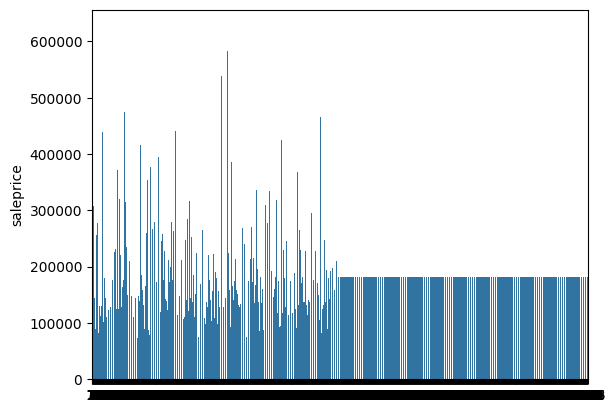

In [ ]:

import seaborn as sns

sns.barplot(df_train['saleprice'])

In [ ]:
# extract the target variable
y_train = df_train['saleprice']
y_test = df_test["saleprice"]
y_val = df_val["saleprice"]

In [ ]:
# check the importance of each features

from sklearn.metrics import mutual_info_score

for col in df_train.columns:
    print(col)
    print()
    print(mutual_info_score(df_train["saleprice"], df_train[col]))
    

mssubclass

0.7110485661734773
mszoning

0.22967045310401502
lotarea

3.18641976854993
lotconfig

0.2700704109907457
bldgtype

0.216337385745406
overallcond

0.43086643274817316
yearbuilt

1.7571212801483234
yearremodadd

1.4573328493353337
exterior1st

0.6315956825891478
bsmtfinsf2

0.43601540158716645
totalbsmtsf

2.8284876622580644
saleprice

3.6069689386187074


c:\Users\David\OneDrive\Desktop\project\machine-learning\midproject\mlenv\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
c:\Users\David\OneDrive\Desktop\project\machine-learning\midproject\mlenv\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
c:\Users\David\OneDrive\Desktop\project\machine-learning\midproject\mlenv\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
c:\Users\David\OneDrive\Desktop\project\machine-learning\midproject\mlenv\Lib\site-packages\sklearn\

In [28]:
df_train[df_numerical].corrwith(df_train["saleprice"])

mssubclass     -0.049021
lotarea         0.247032
overallcond    -0.049549
yearbuilt       0.364672
yearremodadd    0.366207
bsmtfinsf2      0.000734
totalbsmtsf     0.433770
saleprice       1.000000
dtype: float64

In [32]:
# del target in df
del df_train['saleprice']
del df_val['saleprice']
del df_test['saleprice']

In [33]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [35]:
train_dic = df_train.to_dict(orient="records")
val_dic = df_val.to_dict(orient="records")
test_dic = df_test.to_dict(orient="records")

In [36]:
dv = DictVectorizer(sparse=False)
X_train_d = dv.fit_transform(train_dic)
X_test_d = dv.transform(test_dic)
X_val_d = dv.transform(val_dic)

len(X_test_d), len(X_val_d), len(X_train_d)


(583, 583, 1747)

In [40]:
from sklearn.metrics import mean_absolute_percentage_error


##### - Using LinearRegression model

In [67]:
model_linear = LinearRegression()

model_linear.fit(X_train_d, y_train)
y_pred_d = model_linear.predict(X_val_d)
print(mean_absolute_percentage_error(y_val, y_pred_d))

0.18732585262965964


##### - using svm model

In [63]:
# svm model
from sklearn import svm
from sklearn.svm import SVC

model_svr = svm.SVR()
model_svr.fit(X_train_d, y_train)
y_pred_svr = model_svr.predict(X_val_d)
print(mean_absolute_percentage_error(y_val, y_pred_svr))

0.16793873900950654


In [65]:
# random forest regression model
model_rfr = RandomForestRegressor(n_estimators=10, max_depth=5)
model_rfr.fit(X_train_d, y_train)
y_pred_rfr = model_rfr.predict(X_val_d)

print(mean_absolute_percentage_error(y_val, y_pred_rfr))

0.1870785289519236


In [66]:
model_rfr = RandomForestRegressor(n_estimators=10, max_depth=5)
model_rfr.fit(X_train_d, y_train)
y_pred_rfr = model_rfr.predict(X_val_d)

print(mean_absolute_percentage_error(y_val, y_pred_rfr))

0.1853203465313679


##### - Save the best model

In [56]:
import pickle as pk

with open("model_svm.bin",'wb') as f_out:
    pk.dump((dv, model_svr), f_out)